In [2]:
import ipywidgets as widgets
import time
#from IPython.display import display
from IPython.display import display, Javascript
import pandas as pd
import datetime;
import numpy as np
import random

In [21]:
#df = read_csv('')
df = pd.DataFrame(columns=['seconds','Qtype','Option','Correct','From','QNo','Date'])
df.head()

,seconds,Qtype,Option,Correct,From,QNo,Date


In [43]:
Text=widgets.Text(
    value='Enter text',
    
    disabled=False
)
display(Text)

Text(value='Enter text')

In [41]:
def insert(df,seconds,Qtype,Option,Correct,From,Qno):
    
    df.loc[-1] = createVal(seconds,Qtype,Option,Correct,From,Qno)
    print("Value added")
    display(df.loc[-1])
    df= df.reset_index(drop=True)
    
    save(df,'Data.csv')
    return df
    #return 1
    
def createVal(seconds,Qtype,Option,Correct,From,Qno):
    #adds todays date
    date = datetime.datetime.now()
    
    return [seconds,Qtype,Option,Correct,From,Qno,date]

def correct(df,column,loc,value):
    df[column].loc[loc] = value
def save(df,name):
    df.to_csv(name,index=False)

In [45]:
df
play = widgets.Play(
    value=0,
    min=0,
    max=1000,
    step=1,
    interval=1000,
    description="Timer",
    disabled=False
)
slider = widgets.IntSlider(min=0,max=1000)
widgets.jslink((play, 'value'), (slider, 'value'))

display(widgets.HBox([play, slider]))

Q_type=widgets.RadioButtons(
    options=['IR', 'Verbal', 'Quant'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Qtype:',
    disabled=False
)
display(Q_type)
Option_Selected =widgets.RadioButtons(
    options=['A', 'B', 'C','D','E'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Options:',
    disabled=False
)
display(Option_Selected)
Correct = widgets.RadioButtons(
    options=['A', 'B', 'C','D','E'],
#    value='pineapple', # Defaults to 'pineapple'
    layout={'width': 'max-content'}, # If the items' names are long
    description='Correct:',
    disabled=False
)
display(Correct)
From = widgets.Text(
    value='GMAT_StudyGuide',
    placeholder='Paste ticket description here!',
    description='From:',
    disabled=False
)
QNo=widgets.Text(
    value='Chp_',
    placeholder='Paste ticket description here!',
    description='Question Number',
    disabled=False
)
display(From,QNo)
Button = widgets.Button(
    description='Insert',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to add to dataframe',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
def i(b):
    insert(df,slider.value,Q_type.value,Option_Selected.value,Correct.value,From.value,QNo.value)
    
Button.on_click(i)
display(Button)
#df= df.reset_index(drop=True)
print(slider.value)

RadioButtons(description='Qtype:', options=('IR', 'Verbal', 'Quant'), value='IR')

RadioButtons(description='Options:', options=('A', 'B', 'C', 'D', 'E'), value='A')

RadioButtons(description='Correct:', layout=Layout(width='max-content'), options=('A', 'B', 'C', 'D', 'E'), va…

Text(value='GMAT_StudyGuide', description='From:', placeholder='Paste ticket description here!')

Text(value='Chp_', description='Question Number', placeholder='Paste ticket description here!')

Button(description='Insert', style=ButtonStyle(), tooltip='Click to add to dataframe')

0


In [46]:
print(slider.value)

155


In [40]:
df

,seconds,Qtype,Option,Correct,From,QNo,Date
0,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:37:22.535691
1,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:38:37.638425
-1,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:38:58.282125


In [45]:
data =pd.DataFrame(columns=)
data.loc[-1]=createVal(slider.value,'IR',True,'GMAT','GMAT_StudyGuide')
data = data.reset_index(drop=True)
data.head()
data.loc[-1]=createVal(slider.value,'IR',True,'GMAT','A',generateFrom(True,Q(7,10)))
data = data.reset_index(drop=True)
data.head()

,seconds,Qtype,isCorrect,Testtype,From,Date
0,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.365946
1,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.375510


In [50]:
data['seconds'].loc[0]=999

C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
correct(data,'seconds',0,60)
data.head()

,seconds,Qtype,isCorrect,Testtype,From,Date
0,60,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.365946
1,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.375510


In [79]:
from datetime import timedelta
seconds_list = [np.random.randint(50,300) for i in range(100)]
listtype =['IR','Verbal','Quant']
Qtype = [listtype[i%3] for i in range(100)]
Testtype = ['GMAT' for i in range(100)]
From = ['GMAT_StudyGuide...' for i in range(100)]
Answertype =['A','B','C','D','E']
Option = [Answertype[i%5] for i in range(100)]
CorrectType = [True,False]
isCorrect= [CorrectType[i%2] for i in range(100)]
CorrectAnswer =[Option[i] for i in range(50)]
Biaslist = [Answertype[i%5] for i in range(50)]
for a in Biaslist:
    CorrectAnswer.append(a)
Date = [datetime.datetime.now()+timedelta(days=np.floor(i/10),minutes=i*3) for i in range(100)]


In [80]:
data= pd.DataFrame()
data['seconds'] = seconds_list
data['Qtype'] = Qtype
#data['Testtype'] = Testtype
data['From'] = From
data['Option'] = Option
data['CorrectAnswer'] = CorrectAnswer
data['Date'] = Date
data.head()

,seconds,Qtype,From,Option,CorrectAnswer,Date
0,243,IR,GMAT_StudyGuide...,A,A,2020-10-17 16:13:27.796164
1,284,Verbal,GMAT_StudyGuide...,B,B,2020-10-17 16:16:27.796164
2,181,Quant,GMAT_StudyGuide...,C,C,2020-10-17 16:19:27.796164
3,284,IR,GMAT_StudyGuide...,D,D,2020-10-17 16:22:27.796164
4,195,Verbal,GMAT_StudyGuide...,E,E,2020-10-17 16:25:27.796164


In [81]:
data['isCorrect'] = [True if i['Option']==i['CorrectAnswer'] else False for index,i in data.iterrows()]

In [82]:
d=data.groupby('Qtype')

In [83]:
data['week'] = [i.strftime("%V") for i in data['Date']]
data

,seconds,Qtype,From,Option,CorrectAnswer,Date,isCorrect,week
0,243,IR,GMAT_StudyGuide...,A,A,2020-10-17 16:13:27.796164,True,42
1,284,Verbal,GMAT_StudyGuide...,B,B,2020-10-17 16:16:27.796164,True,42
2,181,Quant,GMAT_StudyGuide...,C,C,2020-10-17 16:19:27.796164,True,42
3,284,IR,GMAT_StudyGuide...,D,D,2020-10-17 16:22:27.796164,True,42
4,195,Verbal,GMAT_StudyGuide...,E,E,2020-10-17 16:25:27.796164,True,42
...,...,...,...,...,...,...,...,...
95,106,Quant,GMAT_StudyGuide...,A,A,2020-10-26 20:58:27.796164,True,44
96,141,IR,GMAT_StudyGuide...,B,B,2020-10-26 21:01:27.796164,True,44
97,180,Verbal,GMAT_StudyGuide...,C,C,2020-10-26 21:04:27.796164,True,44
98,197,Quant,GMAT_StudyGuide...,D,D,2020-10-26 21:07:27.796164,True,44


In [91]:
d=data.groupby(['week','Qtype']).mean()
d= pd.DataFrame(d)
d.reset_index(inplace=True)
d

,week,Qtype,seconds,isCorrect
0,42,IR,203.857143,True
1,42,Quant,123.000000,True
2,42,Verbal,202.714286,True
3,43,IR,174.739130,True
4,43,Quant,185.791667,True
5,43,Verbal,173.608696,True
6,44,IR,175.500000,True
7,44,Quant,198.666667,True
8,44,Verbal,165.333333,True


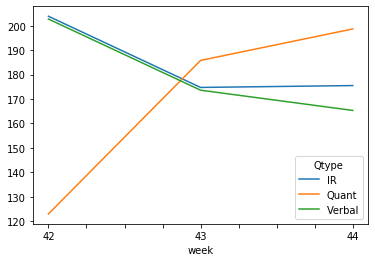

In [100]:
d = d.pivot(index='week', columns='Qtype', values='seconds')
d.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023136216048>],
      dtype=object)

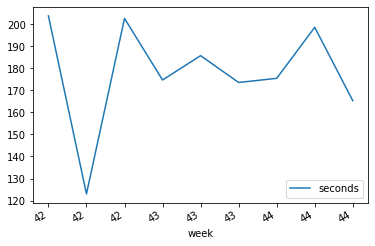

In [99]:
d.plot(x='week',y='seconds',kind='line',subplots=True)